# Assignment 2 - Logistic Regression & Naive Bayes

Due by 11:59pm, Oct 16, 2022

## Theory Questions (Full points: 40, each question 5 points)

1. Explain the importance of setting up learning rate in the gradient descent based methods. 

**Answer:**
The gradient descent method is used to estimate the parameters in machine learning model. It is also known as an optimization technique. The Learning rate is an hyper parameter, we assign some specific value so that we can control the learning of the algorithm.In a model the learning rate is introduced to get a best fit model, which can learn by itself.

In gradient descent, we will have model parameters such as theta0 and theta1, when we calculate the cost of a function if there is an error then we should change the model parameters using gradient descent technique, here the learning rate is nothing but steps towards the best fit model. It is used to control the rate at which an algorithm updates the parameter estimates or learns the values of the parameters.  


2. What is the stochastic gradient descent? Why do we need stochastic gradient descent?

**Answer:**
The stochastic gradient descent only the some samples of data is selected from the dataset at each iteration, rather than taking the whole dataset like gradient descent. The word stochastic means 'random', to reduce the computation SGD will randomly picks a data point from the dataset at each iteration.

The goal of both SGD and GD is to reach the minima. It does not matter how we reach there, the only thing we need to consider is the computation time on training dataset. The way the stochastic gradient descent follows is noisy, but it will be considered while the learning algorithm.


3. Explain the reasons to perform feature scaling.

**Answer:**
When we initially collect features into dataset to train model. The different features have different ranges, some features have high range of values, and the model may assume it has more superiority. There will be many problems while training, so we will do feature scaling as part of data preprocessing, it will be used to normalize the data into an finite range. For instance, the 10 dollar’s is not equal to 10 gallons they are completely different, but the model is not aware of it and treats both as same.

4. What is the probabilistic generative model?

**Answer:**
In genarative model, what makes a model genarative is totally different in machine learning compared to applied statistics. It is defined as an pobabilistic model in machine learning,which varies from observation to observation in the entire space. if we take a conditional model it will not be generative because it lacks in probalistic model.The generative model can create new data cases.

5. Explain how we perform maximum likelihood.

**Answer:**
The maximum likelihood is an technique is used to solve problems like density estimation. The density estimation is a problem of approximating problem domain probability distribution for sample of observations. This technique can look for a space for possible distribution and parameters. This is method is foundation for many other machine learning algorithms like linear regression, logistic regression to predict their class labels. It is mostly used in deep learning, ANN. The maximum likelihood, we look at a problem as optimization or search for a set of variables that best fits the joint probability of the data samples.

6. Explain the reasons about using cross entropy loss in logistic regression.

**Answer:**
The cross entropy or log loss is an loss function used in logistic regression. It is used for training classification model, which is used to classify the given data by seeing the probability of predicting that belongs to which class. If the loss is high that indicates the predicted probability of class is different than actual class . The cross entropy loss is also termed as log loss. The MSE(mean square error) is also a loss fun but it cannot be used in classification.

As there is no sigmoid derivative in the cross entropy derivative with regard to weight, the value of the derivative will only be based on the difference between actual and predicted results. Therefore, learning will occur more quickly since the derivative will initially have a large value due to the random weights, and once the error decreases, the derivative value will become tiny to prevent bouncing away from the global minima.

7. Explain the differences between discriminative and generative model.


**Answer:**
Generative model:

The generative model is used to generate new data instances. The model performance is measured by maximum likelihood technique. The distribution is good then model will be accurate, outliers effects the model accuracy badly. This uses very less data for training, and it also can create a model with missing data. ex-predict the next word in the sequence

Discriminative model

This model is used to discriminate between data gathered like labelling the data. These kind of models are having or modelling but strong against outliers. In here model needs more time and data to get model to be trained. In should be aware of all kinds of data to completely get trained.


8. Bishop's Book "Pattern Recognition and Machine learning" - Exercise 4.9

**Answer:**
The likelihood function is given by

p({${φ_{0}},{t_{n}}$}|{${t_{n}}$})= ${∏^{n}_{n=1}}{∏^{k}_{k=1}} {p({φ_{n}}|C_{k})π_{k}}^{t_{nk}}$
and taking the logarithm, we obtain

ln p({${φ_{0}},{t_{n}}$}|{${t_{n}}$}) = ${∑^{n}_{n=1}}{∑^{k}_{k=1}}  {t_{nk}}${ln p(${φ_{n}}|C_{k}) π_{k}$}

We must maintain the constraint in order to maximize the log likelihood with respect to k.${∑_{k}} {π_{k}}$=1  A Lagrange multiplier λ can be used to do this, thereby maximizing

ln p({${φ_{0}},{t_{n}}$}|{${t_{n}}$}) + λ (${∑^{k}_{k=1}} πk − 1 $)

Setting the derivative with respect to $π_{k}$ equal to zero, we obtain

 ${∑^{n}_{n=1}} {t_{nk}}$/${π_{k}}$+ λ = 0.
 
 Re-arranging then gives

 -${π_{k}}$λ =  ${∑^{n}_{n=1}} {t_{nk}}$ = ${N_{k}}$

Summing both sides over k we find that λ = −N, and using this to eliminate λ we
obtain (4.159).

## Programming Questions (Full points: 60, each question 30 points)

In [1]:
# Do not edit the codes in this cell
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
# load dataset
x, y = load_iris(return_X_y=True)

### - Logistic Regression

In [2]:
# Do not edit the codes in this cell
# We use 100 samples and 2 features for logistic regression function
x_lr = x[:100, :2] # class 0 and 1 balanced
y_lr = y[:100]

In the assignment 2, you have more freedom on your programming design. In this part, you are going to implement your own Logistic Regression function. You need to implement logistic regression with stochastic gradient descent from scratch. The required functions are listed below. You can add more functions as you need. **No library versions of logistic regression are allowed**. 
_________

1. train_test_split

**Randomly** split data into train and test set. 80% of the raw data will be the train set and 20% of the raw data will be the test set.

2. sigmoid

The core of logistic regression

3. predict

Predict an output value for a given x with a set of coefficients. 

4. accurate

Calculate accuracy percentage of the predictions.

5. coef_sgd

Estimate logistic regression coefficients using **stochastic gradient descent**. Using **the cross entropy loss**. Carefully choose learning rate and epochs values.

6. draw_model

Plot the final logistic regression model using the final coefficients and raw datasets. Plot title and xlabel, ylabel are required. Show the plot in the Output.

Print out your **testing accurate**. Is it good? If not, analyze the reason in short. 


In [3]:
from sklearn.model_selection import train_test_split

def train_test_split_func():
    
    X_train, X_test, y_train, y_test = train_test_split(x_lr, y_lr, test_size = 0.2, random_state = 0)
    return X_train, X_test, y_train, y_test


def initialize_parameters():
    wt = np.zeros_like(X_train[0])
    bs = 0
    return wt,bs

def sigmoid(z):
    zz=1/(1+np.exp(-z))
    return zz

def coef_sgd(wt,bs,x,y):
    def dw_calculate(wt,bs,x,y):
        z = np.dot(wt,x) + bs
        a = sigmoid(z)
        dw = x * (y - a)
        return dw

    def db_calculate(wt,bs,x,y):
        z = np.dot(wt,x) + bs
        a = sigmoid(z)
        db = y - a
        return db
    
    dw=dw_calculate(wt,bs,x,y)
    db=db_calculate(wt,bs,x,y)
    
    return dw,db
    
def crossentropy_loss(y_true,y_pred):

    SUM = 0
    for i in range(len(y_true)):
        SUM += (y_true[i] * np.log10(y_pred[i])) + ((1 - y_true[i]) * np.log10(1 - y_pred[i]))
    loss = -1 * (1 / len(y_true)) * SUM
    return loss
  

def predict(wt,x,bs):
    z=np.dot(wt, x)+bs
    A=sigmoid(z)
    return A

def train_model(X_train,y_train,X_test,y_test,number_of_epochs,lr_rate):

    train_loss = []
    test_loss = []
    wt, bs = initialize_parameters()
    
    for i in range(number_of_epochs):
        train_pred_record = []
        test_pred_record = []
        for j in range(N):
            
            dw,db = coef_sgd(wt,bs,X_train[j],y_train[j])
            
            wt = wt + (lr_rate * dw)
            bs = bs + (lr_rate * db)
            
        for k in range(len(X_train)):
        
            A=predict(wt,X_train[k],bs)
            train_pred_record.append(A)
            
        train_loss_val = crossentropy_loss(y_train, train_pred_record)
        train_loss.append(train_loss_val)
            
        for k in range(len(X_test)):
            
            A=predict(wt,X_test[k],bs)
            test_pred_record.append(A)
            
        test_loss_val = crossentropy_loss(y_test, test_pred_record)
        test_loss.append(test_loss_val)

    return wt,bs,train_loss,test_loss,test_pred_record,train_pred_record     


learning_rate=0.09
X_train, X_test, y_train, y_test=train_test_split_func()
N=len(X_train)
epochs=15

wt,bs,train_log_loss,test_log_loss,test_pred_record,train_pred_record=train_model(X_train,y_train,X_test,y_test,epochs,learning_rate)

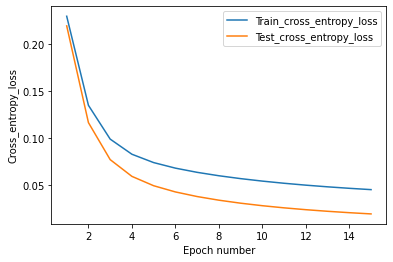

In [4]:
from matplotlib import pyplot as plt

def draw_model(e):
    epoch = [i for i in range(1,e+1,1)]

    plt.plot(epoch,train_log_loss , label='Train_cross_entropy_loss')
    plt.plot(epoch,test_log_loss, label='Test_cross_entropy_loss')
    plt.xlabel("Epoch number")
    plt.ylabel("Cross_entropy_loss")
    plt.legend()
    plt.show

draw_model(epochs)

In [5]:
def accurate(predictions,gt,flag):
    tp=0
    tn=0
    fp=0
    fn=0

    for i in range(len(predictions)):
        ps=predictions[i]
        gg=gt[i]

        if (gg==1 and ps==1):
            tp=tp+1
        elif (gg==1 and ps==0):
            fn=fn+1
        elif(gg==0 and ps==0):
            tn=tn+1
        elif(gg==0 and ps==1):
            fp=fp+1
    if flag==0:
        print("The Training metrics")
    else:
        print("The Testing metrics")
        
    print("True positive,False positive,True negative,False negative=",tp,fp,tn,fn)
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    print("Accuracy=",accuracy)
    print("-")
    print("-")
    
    


predictions_test=np.where( np.array(test_pred_record) > 0.5, 1, 0 )
predictions_train=np.where( np.array(train_pred_record) > 0.5, 1, 0 )

accurate(predictions_test,y_test,1)
accurate(predictions_train,y_train,0)
print("Testing metrics are:\nAccuracy = 100%\n")
print("Training metrics are:\nAccuracy = 98.75%\n")

The Testing metrics
True positive,False positive,True negative,False negative= 10 0 10 0
Accuracy= 1.0
-
-
The Training metrics
True positive,False positive,True negative,False negative= 40 1 39 0
Accuracy= 0.9875
-
-
Testing metrics are:
Accuracy = 100%

Training metrics are:
Accuracy = 98.75%



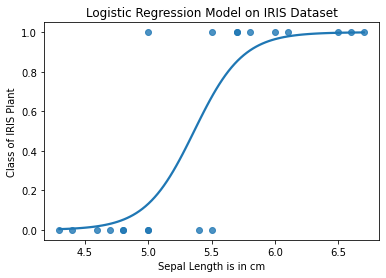

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=X_test[:,0], y=predictions_test, data=X_test, logistic=True, ci=None)
plt.xlabel('Sepal Length is in cm')
plt.ylabel('Class of IRIS Plant')
plt.title('Logistic Regression Model on IRIS Dataset')
plt.show()

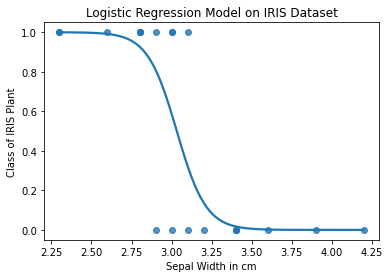

In [7]:
sns.regplot(x=X_test[:,1], y=predictions_test, data=X_test, logistic=True, ci=None)
plt.xlabel('Sepal Width in cm')
plt.ylabel('Class of IRIS Plant')
plt.title('Logistic Regression Model on IRIS Dataset')
plt.show()

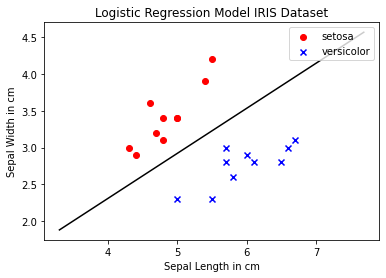

In [8]:
x_ax = np.arange(X_test[:, 0].min()-1, X_test[:, 0].max()+1, 0.01)
weight1 = wt[0]
weight2 = wt[1]
bs = bs
plt.plot(x_ax, -weight1*x_ax/weight2 - bs/weight2, color='black')


setosa = np.where(y_test == 0)
versicolor = np.where(y_test == 1)

plt.scatter(X_test[setosa, 0], X_test[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_test[versicolor, 0], X_test[versicolor, 1],
            color='blue', marker='x', label='versicolor')
plt.title('Logistic Regression Model IRIS Dataset')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend(loc='upper right')
plt.show()

### - Naive Bayes Classifier

In this part, you are going to implement your own naive bayes classifier. 
You need to implement naive bayes classifier from scratch **using the whole imported iris datasets x and y**. The required functions are listed below. You can add more functions as you need. **No library versions of naive bayes classifier are allowed**. 
_________

1. cross_validation_split

**Randomly** split data into 5 folds. That means 30 records will be in each fold.

2. predict

Predict the class label for a given x. 

3. accurate

Calculate accuracy percentage of the predictions. Remember to average the results of k folds

4. gaussian_probability

Calculate the Gaussian probability distribution function for the given x. 

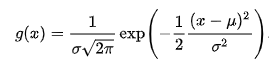


5. class_probability

Calculate the probabilities of predicting each class for a given x using naive bayes algorithm. Be aware that we have multiple input variables. And you may want to use gaussian_probability function here.

*Print out your accuracy result. Is it good? If not, analyze the reason in short. *


In [9]:
from math import sqrt
from math import exp
from math import pi
import random

def cross_valid_split(dataset, n_folds):
    dset_split = list()
    dset_copy = dataset

    fold_size = int(len(dataset) / n_folds)
    for zz in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dset_copy))
            fold.append(dset_copy.pop(index))
        dset_split.append(fold)
    return dset_split


def accurate(gt, pred):
    c_match = 0
    for i in range(len(gt)):
        if gt[i] == pred[i]:
            c_match += 1
    return c_match / float(len(gt)) * 100.0


def build_test_algo(dataset, NB_algo, n_folds, *args):
    folds = cross_valid_split(dataset, n_folds)
    s_record = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)


        preds = NB_algo(train_set, test_set, *args)
        gt = [row[-1] for row in fold]
        accuracy_val = accurate(gt, preds)
    s_record.append(accuracy_val)
    return s_record


def separation_classwise(dataset):
    
    separated_dict = dict()
    for i in range(len(dataset)):
        vec = dataset[i]
        class_lab = vec[-1]
        if (class_lab not in separated_dict):
            separated_dict[class_lab] = list()
        separated_dict[class_lab].append(vec)
    return separated_dict


def mean(nums):
    return sum(nums)/float(len(nums))


def standard_dev(nums):
    avg = mean(nums)
    var = sum([(x-avg)**2 for x in nums]) / float(len(nums)-1)
    return sqrt(var)


def summarizing_dataset(dataset):

    summaries = [(mean(column), standard_dev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])

    return summaries


def summarization_classwise(dataset):
    separated = separation_classwise(dataset)

    summaries_of_individual_classes = dict()
    for class_val, rows in separated.items():

        summaries_of_individual_classes[class_val] = summarizing_dataset(rows)

        
    return summaries_of_individual_classes


def gaussian_probability(x, mean, standard_dev):
    exponent = exp(-((x-mean)**2 / (2 * standard_dev**2 )))
    return (1 / (sqrt(2 * pi) * standard_dev)) * exponent


def class_probability(summaries, row):


    total_rows = sum([summaries[label][0][2] for label in summaries])
    prob_dict = dict()

    for class_value, class_summaries in summaries.items():
        prob_dict[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            prob_dict[class_value] *= gaussian_probability(row[i], mean, stdev)
    return prob_dict


def predict(summaries, row):
    probabilities = class_probability(summaries, row)
    best_class_label, best_probability = None, -1
    for class_value, prob in probabilities.items():
        if best_class_label is None or prob > best_probability:
            best_probability = prob
            best_class_label = class_value
    return best_class_label


def Naive_Bayes_Algo(train_data, test_data):
    summarize = summarization_classwise(train_data)
    predictions_list = list()

    for row in test_data:
        output_result = predict(summarize, row)
        predictions_list.append(output_result)
    return(predictions_list)


from sklearn.datasets import load_iris
x, y = load_iris(return_X_y=True)
x=x.tolist()
y=y.tolist()
dataset=[]
for i in range(len(x)):
    s=x[i]
    s.extend([y[i]])
    dataset.append(s)

num_of_folds = 5

scores_vals = build_test_algo(dataset, Naive_Bayes_Algo, num_of_folds)

print("The Mean Accuracy=", (sum(scores_vals)/float(len(scores_vals))))
print("Accuracy is good")

The Mean Accuracy= 96.66666666666667
Accuracy is good
